## Ⅰ Connections and Experiments

1. Create a joystick object ``joyconrobotics_right``, for automatic attitude calibration and initialization, please place the joystick horizontally on the desktop stationary

In [ ]:
from joyconrobotics import JoyconRobotics

joyconrobotics_right = JoyconRobotics("right")

joyconrobotics_right.disconnnect()

connect to right joycon successful.
calibrating(4 seconds)..., please place it horizontally on the desktop.
Joycon calibrations is complete.



2. Visual Operational Adaptation

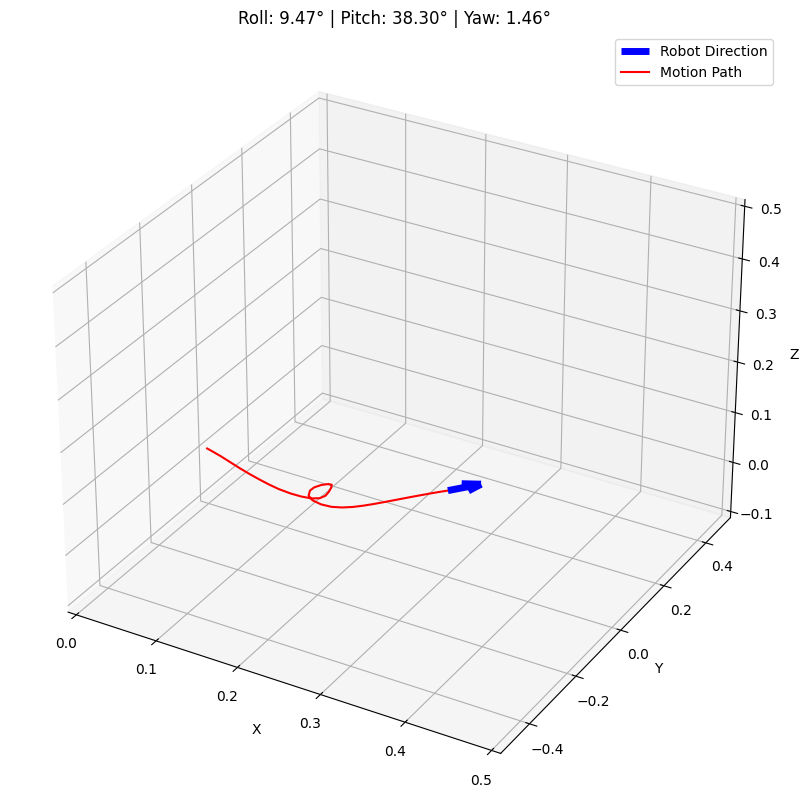

You pressed the X button, program ending


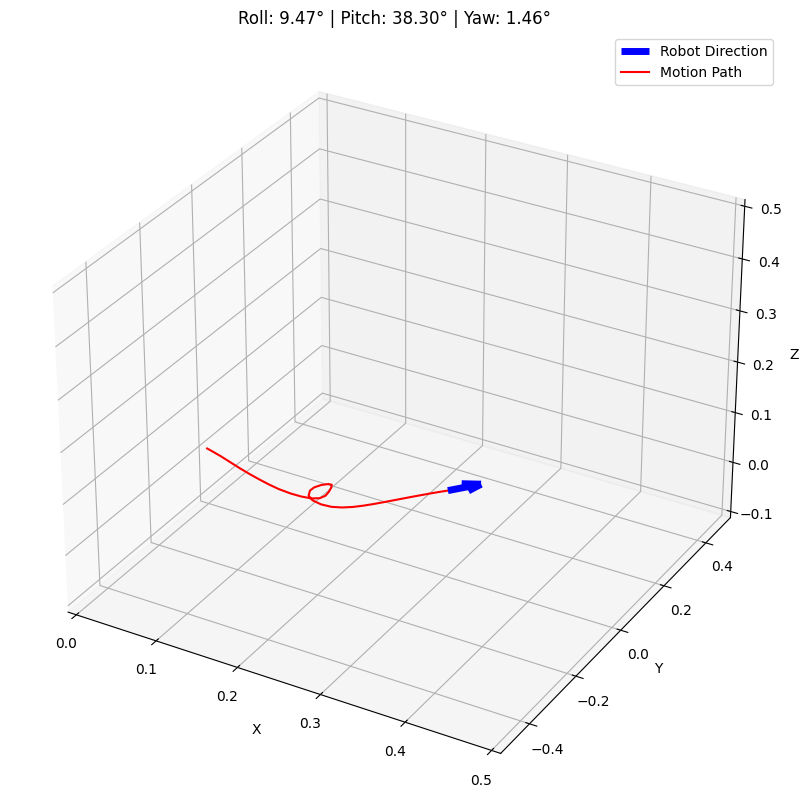

In [1]:
import math
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output
from glm import vec3
from joyconrobotics import JoyconRobotics

try:
    joyconrobotics_right = JoyconRobotics("right") # , dof_speed=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]
except:
    joyconrobotics_right = JoyconRobotics("left") # , dof_speed=[0.5, 0.5, 0.5, 0.5, 0.5, 0.5]

# Create waveform plot
plt.ion()  # Enable interactive mode
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(111, projection='3d')

# Initialize data containers
time_data = []
direction_data = [[], [], []]  # Split into three sub-data (assuming direction contains three values)
history_x, history_y, history_z = [], [], []  # Used to record motion history coordinates

max_time = 10  # Maximum time range to display data (in seconds)
x, y, z = 0, 0, 0

for i in range(1000):  # Continuously get data and update the plot
    time_data.append(i * 0.05)  # Time data

    pose, gripper, control_button = joyconrobotics_right.get_control()
    x = pose[0]
    y = pose[1]
    z = pose[2]
    direction_data[0].append(pose[3])  # Roll
    direction_data[1].append(pose[4])  # Pitch
    direction_data[2].append(pose[5])  # Yaw
    
    # Limit the displayed data length
    if len(time_data) > max_time / 0.05:
        time_data = time_data[-int(max_time / 0.05):]
        direction_data[0] = direction_data[0][-int(max_time / 0.05):]
        direction_data[1] = direction_data[1][-int(max_time / 0.05):]
        direction_data[2] = direction_data[2][-int(max_time / 0.05):]
    
    # Clear previous frame
    clear_output(wait=True)

    # Get current roll, pitch, yaw (in radians) and convert to degrees
    roll, pitch, yaw = direction_data[0][-1], direction_data[1][-1], direction_data[2][-1]
    # yaw = -yaw # for the UI
    
    roll_deg = math.degrees(roll) # Convert to degrees
    pitch_deg = math.degrees(pitch)
    yaw_deg = math.degrees(yaw)

    # Calculate direction vector (apply roll, pitch, yaw to direction vector via rotation matrix)
    direction_vector = vec3(
        math.cos(pitch) * math.cos(yaw),
        math.cos(pitch) * math.sin(yaw),
        math.sin(pitch))
    
    # Draw direction vector (thick arrow)
    ax.clear()  # Clear previous plot
    # ax.quiver(x, y, z, direction_vector[0], direction_vector[1], direction_vector[2], length=0.02, color='b', label='Robot Direction', linewidth=5, arrow_length_ratio=0.01)
    
    ax.quiver(x, y, z, direction_vector[0], direction_vector[1], direction_vector[2], 
          length=0.05, color='b', label='Robot Direction', linewidth=5, arrow_length_ratio=0.5)

    # Record current position
    history_x.append(x)
    history_y.append(y)
    history_z.append(z)
    
    # Draw motion history
    ax.plot(history_x, history_y, history_z, color='r', alpha=1, label='Motion Path')

    # Set axis labels
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title(f'Roll: {roll_deg:.2f}° | Pitch: {pitch_deg:.2f}° | Yaw: {yaw_deg:.2f}°')

    # Set plot display range
    ax.set_xlim([ 0.0, 0.5])
    ax.set_ylim([-0.5, 0.5])
    ax.set_zlim([-0.1, 0.5])
    
    ax.legend(loc='upper right')
    
    # Display plot
    display(fig)
    
    # Exit button
    if joyconrobotics_right.button.get_button_x() == 1:
        print('You pressed the X button, program ending')
        break
    
    # Pause briefly to simulate real-time data acquisition
    time.sleep(0.01)

joyconrobotics_right.disconnnect()
plt.ioff()  # Disable interactive mode

----

## Ⅱ Getting More Detailed Data

#### 1. Observation Orientation Waveform

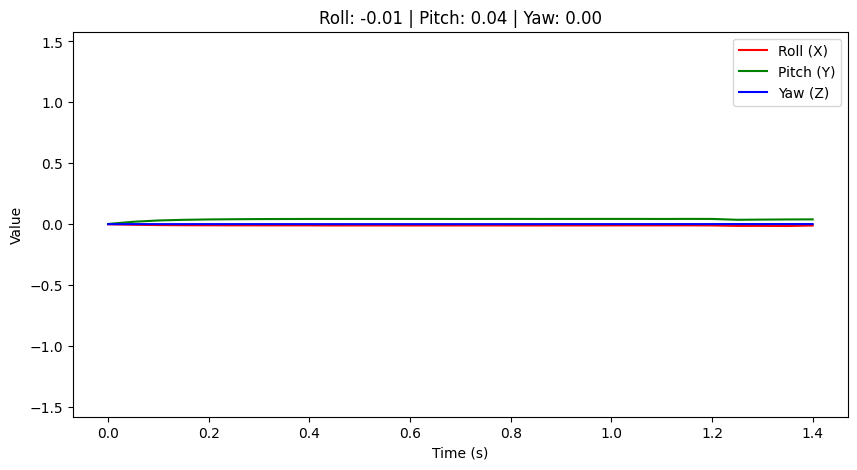

You pressed the X button, program terminating


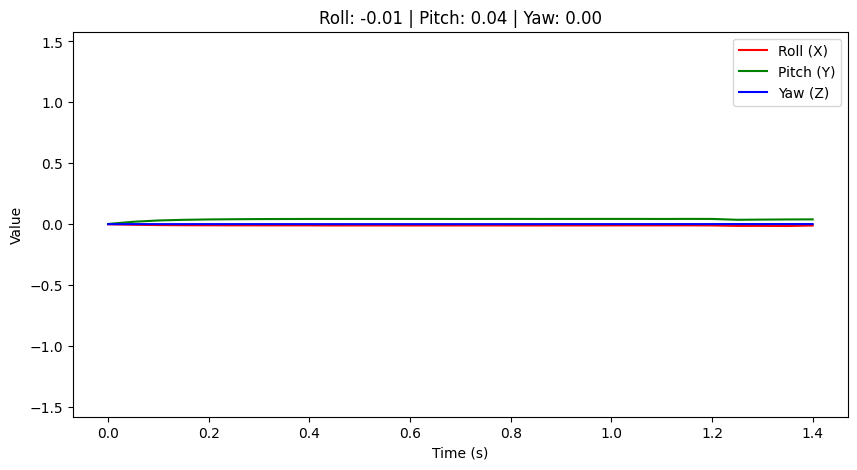

In [2]:
import time
import matplotlib.pyplot as plt
from IPython.display import display, clear_output

from joyconrobotics import JoyconRobotics

joyconrobotics_right = JoyconRobotics("right")

# Create waveform plot
plt.ion()  # Enable interactive mode
fig, ax = plt.subplots(figsize=(10, 5))

# Initialize data containers
time_data = []
direction_data = [[], [], []]  # Three sub-lists for roll, pitch, and yaw values

# Set display time range
max_time = 10  # Maximum time range to display (in seconds)

for i in range(1000):  # Continuously get data and update plot
    # Get data
    time_data.append(i * 0.05)  # Time data
    
    pose, gripper,_ = joyconrobotics_right.get_control()
    
    direction_data[0].append(pose[3])  # Roll data
    direction_data[1].append(pose[4])  # Pitch data
    direction_data[2].append(pose[5])  # Yaw data
    
    # Limit displayed data length
    if len(time_data) > max_time / 0.05:
        time_data = time_data[-int(max_time / 0.05):]
        direction_data[0] = direction_data[0][-int(max_time / 0.05):]
        direction_data[1] = direction_data[1][-int(max_time / 0.05):]
        direction_data[2] = direction_data[2][-int(max_time / 0.05):]
    
    # Clear previous frame
    clear_output(wait=True)

    # Plot waveforms
    ax.clear()
    ax.plot(time_data, direction_data[0], label='Roll (X)', color='r')  # Roll (X-axis, red) [-0.6, +0.6], +0.6 when facing up, -0.6 when upside down
    ax.plot(time_data, direction_data[1], label='Pitch (Y)', color='g')  # Pitch (Y-axis, green)
    ax.plot(time_data, direction_data[2], label='Yaw (Z)', color='b')  # Yaw (Z-axis, blue) - does not accumulate
    
    ax.set_xlabel('Time (s)')
    ax.set_ylabel('Value')
    ax.legend(loc='upper right')
    ax.set_title(f'Roll: {direction_data[0][-1]:.2f} | Pitch: {direction_data[1][-1]:.2f} | Yaw: {direction_data[2][-1]:.2f}')
    ax.set_ylim(-1.58, 1.58)
    
    # Display plot
    display(fig)
    
    if joyconrobotics_right.listen_button('home') == 1:
      joyconrobotics_right.reset_joycon()
      
    # Exit button
    if joyconrobotics_right.button.get_button_x() == 1:
        print('You pressed the X button, program terminating')
        break
    
    # Pause briefly to simulate real-time data acquisition
    time.sleep(0.001)

joyconrobotics_right.disconnnect()
plt.ioff()  # Disable interactive mode

2. Read position and jaw control (click trigger => toggle control state)

In [ ]:
import time
from joyconrobotics import JoyconRobotics
joyconrobotics_right = JoyconRobotics("right", without_rest_init=True)

# Posture acquisition loop
while 1:
    clear_output(wait=True)
    
    posture, gripper_status,_ = joyconrobotics_right.get_control()
    print("Posture:", [f"{x:.3f}" for x in posture], f'{gripper_status=}')
    
    # Exit button check
    if joyconrobotics_right.button.get_button_x() == 1:
        print('You pressed the X button, program terminating')
        break
    
    time.sleep(0.1)
    
joyconrobotics_right.disconnnect()

3. Customizing keys

In [ ]:
# Program description: Continuously monitors the button states of the right controller.
# Exits the program loop when the right trigger (R) is pressed.
# Right controller buttons: r, zr, y, x, a, b, plus, r-stick, home, sr, sl
# Left controller buttons: l, zl, left, up, right, down, minus, l-stick, capture, sr, sl

import time
from joyconrobotics import JoyconRobotics
joyconrobotics_right = JoyconRobotics("right", without_rest_init=True)

while 1:
    r_button_status = joyconrobotics_right.listen_button('r', show_all=True) # show_all monitors all button state changes
    
    if r_button_status or joyconrobotics_right.button.get_button_x() == 1:
        print('You pressed the R trigger or X button, program terminating')
        break

    time.sleep(0.1)

joyconrobotics_right.disconnnect()

connect to right joycon successful.
calibrating(4 seconds)..., please place it horizontally on the desktop.
Joycon calibrations is complete.

a 0
You pressed the R trigger or X button, program terminating


---

#### Ⅲ Ending：

Have a great time! Box2AI January 13, 2025 All Rights Reserved